# TEST SMRT ATMOSPHERE (simple_atmosphere)

In [20]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append(r"C:\Users\zschende\OneDrive - Ilmatieteen laitos\Data\smrt")

In [21]:
from smrt import make_snowpack, make_model, sensor_list, make_atmosphere

In [22]:
# Dictionaries
thetad = [0, 20, 40]  # {10e9: [0, 20, 40], 21e9: [0, 10, 20]}
tbdownd = {10e9: [23, 58, 64], 21e9: [10, 20, 30]}
tbupd = {10e9: [5, 10, 15], 21e9: [6, 7, 8]}
transd = {10e9: [1, 0.9, 0.8], 21e9: [0.95, 0.85, 0.75]}

# Arrays
thetaa = [0, 20, 40]
tbdowna = [20, 30, 40]
tbupa = [50, 60, 150]
transa = [0.5, 0.6, 0.7]

In [23]:
# Make atmos from array
atmosa = make_atmosphere("simple_atmosphere", theta=thetaa, tb_down=tbdowna, tb_up=tbupa, transmittance=transa)

In [24]:
# Create mu array (cosine of incidence angle)
mu = np.cos(np.deg2rad(np.arange(0, 90, 2)))

In [25]:
a_res = atmosa.run(10e9, mu, 1)

In [26]:
a_res.tb_down

array([20.        , 20.10101135, 20.40392233, 20.9083639 , 21.61372147,
       22.51913567, 23.62350338, 24.92547912, 26.42347662, 28.11567081,
       30.        , 30.72035114, 31.50575511, 32.35525504, 33.26781592,
       34.24232595, 35.27759783, 36.37237026, 37.5253094 , 38.7350106 ,
       40.        , 40.        , 40.        , 40.        , 40.        ,
       40.        , 40.        , 40.        , 40.        , 40.        ,
       40.        , 40.        , 40.        , 40.        , 40.        ,
       40.        , 40.        , 40.        , 40.        , 40.        ,
       40.        , 40.        , 40.        , 40.        , 40.        ])

Text(0.5, 1.0, '21 GHz')

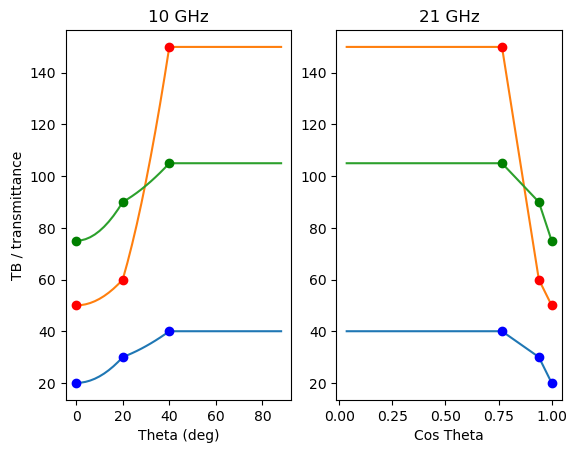

In [35]:
newtheta = np.rad2deg(np.arccos(mu))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(newtheta, a_res.tb_down, label="tbdown")
ax1.plot(thetaa, tbdowna, "bo")
ax1.plot(newtheta, a_res.tb_up, label="tbup")
ax1.plot(thetaa, tbupa, "ro")
scale = 150
ax1.plot(newtheta, a_res.transmittance * scale, label="trans * " + str(scale))
ax1.plot(thetaa, np.array(transa) * scale, "go")
ax1.set_xlabel("Theta (deg)")
ax1.set_ylabel("TB / transmittance")
ax1.set_title("10 GHz")

ax2.plot(mu, a_res.tb_down, label="tbdown")
ax2.plot(np.cos(np.deg2rad(thetaa)), tbdowna, "bo")
ax2.plot(mu, a_res.tb_up, label="tbup")
ax2.plot(np.cos(np.deg2rad(thetaa)), tbupa, "ro")
scale = 150
ax2.plot(mu, a_res.transmittance * scale, label="trans * " + str(scale))
ax2.plot(np.cos(np.deg2rad(thetaa)), np.array(transa) * scale, "go")
ax2.set_xlabel("Cos Theta")
ax2.set_title("21 GHz")


# Dictionary

In [31]:
# Dictionary approach
atmosd = make_atmosphere("simple_atmosphere", theta=thetad, tb_down=tbdownd, tb_up=tbupd, transmittance=transd)

In [32]:
d_res_10 = atmosd.run(10e9, mu, 1)
d_res_21 = atmosd.run(21e9, mu, 1)

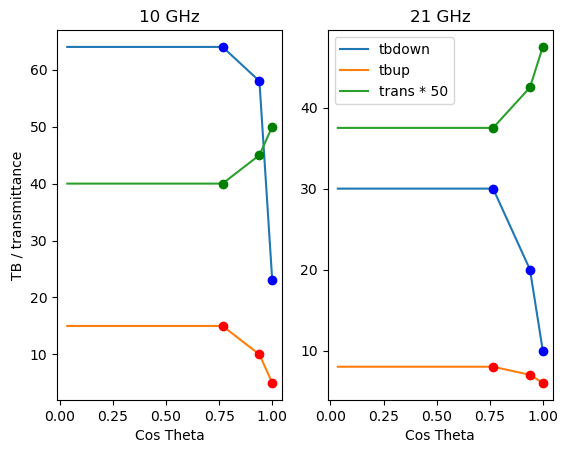

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(mu, d_res_10.tb_down, label="tbdown")
ax1.plot(np.cos(np.deg2rad(thetad)), tbdownd[10e9], "bo")
ax1.plot(mu, d_res_10.tb_up, label="tbup")
ax1.plot(np.cos(np.deg2rad(thetad)), tbupd[10e9], "ro")
scale = 50
ax1.plot(mu, d_res_10.transmittance * scale, label="trans * " + str(scale))
ax1.plot(np.cos(np.deg2rad(thetad)), np.array(transd[10e9]) * scale, "go")
ax1.set_xlabel("Cos Theta")
ax1.set_ylabel("TB / transmittance")
ax1.set_title("10 GHz")

ax2.plot(mu, d_res_21.tb_down, label="tbdown")
ax2.plot(np.cos(np.deg2rad(thetad)), tbdownd[21e9], "bo")
ax2.plot(mu, d_res_21.tb_up, label="tbup")
ax2.plot(np.cos(np.deg2rad(thetad)), tbupd[21e9], "ro")
ax2.plot(mu, d_res_21.transmittance * scale, label="trans * " + str(scale))
ax2.plot(np.cos(np.deg2rad(thetad)), np.array(transd[21e9]) * scale, "go")
ax2.set_xlabel("Cos Theta")
ax2.set_title("21 GHz")
ax2.legend()
